#### Predict your scores better :)
As you saw in the previous simple linear regression task that previous year grades (G2) have significant correlation with third year grades (G3). But G2 is not direct causation of G3, there are many factors which determine G3. Let's add few more variables which may help to determine G3.

### Multiple linear regression
Multiple linear regression is simply the linear regression extended to problems where the dependent or output variable is determined by more than one independent variable.<br>

#####  $\hat{y}$ (w, x) = w_0 + w_1 * x_1 + ... + w_p * x_ps

#### Dataset
The dataset is available at __"data/multiple_linear_data.csv"__ in the respective challenge's repo.<br><br>

This is the __modified version__ of the dataset *'Student Performance'* provided by UCI Machine Learning repository.<br>
Original dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

#### Features (X)
1. age - student's age (numeric: from 15 to 22)
2. address - student's home address type (binary: 'U' - urban or 'R' - rural)
3. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
4. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
5. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
6. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
7. schoolsup - extra educational support (binary: yes or no)
8. famsup - family educational support (binary: yes or no)
9. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
10. activities - extra-curricular activities (binary: yes or no)
11. higher - wants to take higher education (binary: yes or no)
12. internet - Internet access at home (binary: yes or no)
13. romantic - with a romantic relationship (binary: yes or no)
14. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
15. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
16. health - current health status (numeric: from 1 - very bad to 5 - very good)
17. absences - number of school absences (numeric: from 0 to 93)
18. G1 - first year math grades (numeric: from 0 to 100)
19. G2 - second year math grades (numeric: from 0 to 100)

#### Output target (Y) 
20. G3 - final year math grades (numeric: from 0 to 100, output target)

#### Objective
To learn multiple linear regression and practice handling categorical features

#### Tasks
- To load the data and print first 5 rows
- Transform categorical features into numerical features. Use either one hot encoding, label encoding or any other suitable preprocessing technique.
- Define X matrix (independent features) and y vector (target feature)
- Train Linear Regression Model (sklearn.linear_model.LinearRegression class)
- Print 'Mean Squared Error' (MSE) obtained on the same dataset i.e. same X and y (sklearn.metrics.mean_squared_error function)
- Predict on a numpy array defined by you
```python
>>> new_data = np.array([1,0,1,.....,30,20]).reshape(1,-1)
>>> print("Predicted grade:",model.predict(new_data))
```

#### Further fun (will not be evaluated)
- Train LassoRegression and RidgeRegression as well. Read about them from scikit-learn user guide.
- *Step-up challenge*: Get down the MSE (mean squared error) below 3.25 using linear models
- Implement multiple linear regression from scratch
- Plot loss curve (Loss vs number of iterations)

#### Helpful links
- Scikit-learn documentation for linear regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Read till where you feel comfortable: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# IF sklearn.compose.ColumnTransformer is used for feature transformation, then below import will help to infer features
# from helper.utils import get_column_names_from_ColumnTransformer

In [2]:
# NOTE: DO NOT CHANGE THE VARIABLE NAME(S) IN THIS CELL
# Load the data
data = pd.read_csv("data/multiple_linear_data.csv")
data.head(5)

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,U,GT3,course,2,0,yes,no,no,no,yes,no,no,3,4,3,6,25,30,30
1,17,U,GT3,course,2,0,no,yes,no,no,yes,yes,no,3,3,3,4,25,25,30
2,15,U,LE3,other,2,3,yes,no,yes,no,yes,yes,no,3,2,3,10,35,40,50
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70,75
4,16,U,GT3,home,2,0,no,yes,yes,no,yes,no,no,3,2,5,4,30,50,50


In [3]:
# You may need original list of columns to interpret the features after transformation, maybe
orig_cols = data.columns

In [4]:
# Handle categorical values
le = LabelEncoder() 

data['address']= le.fit_transform(data['address']) 
data['famsize']= le.fit_transform(data['famsize'])
data['reason']= le.fit_transform(data['reason']) 
data['schoolsup']= le.fit_transform(data['schoolsup'])
data['famsup']= le.fit_transform(data['famsup']) 
data['paid']= le.fit_transform(data['paid'])
data['activities']= le.fit_transform(data['activities']) 
data['higher']= le.fit_transform(data['higher'])
data['internet']= le.fit_transform(data['internet'])
data['romantic']= le.fit_transform(data['romantic'])

data.head()


,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,1,0,0,2,0,1,0,0,0,1,0,0,3,4,3,6,25,30,30
1,17,1,0,0,2,0,0,1,0,0,1,1,0,3,3,3,4,25,25,30
2,15,1,1,2,2,3,1,0,1,0,1,1,0,3,2,3,10,35,40,50
3,15,1,0,1,3,0,0,1,1,1,1,1,1,2,2,5,2,75,70,75
4,16,1,0,1,2,0,0,1,1,0,1,0,0,3,2,5,4,30,50,50


In [5]:
data.insert(0,"X_0",[1]*data.shape[0],True)
data.head()

,X_0,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,...,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,1,18,1,0,0,2,0,1,0,0,...,1,0,0,3,4,3,6,25,30,30
1,1,17,1,0,0,2,0,0,1,0,...,1,1,0,3,3,3,4,25,25,30
2,1,15,1,1,2,2,3,1,0,1,...,1,1,0,3,2,3,10,35,40,50
3,1,15,1,0,1,3,0,0,1,1,...,1,1,1,2,2,5,2,75,70,75
4,1,16,1,0,1,2,0,0,1,1,...,1,0,0,3,2,5,4,30,50,50


In [6]:
# Define your X and y
X = data.drop('G3',axis=1)
y = data.G3
# X = data.iloc[:,0:20].values
# y = data.iloc[:,20].values

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
# Initialize the model
model = LinearRegression()

In [9]:
# Fit the model. Wait! We will complete this step for you ;)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Predict on training data
y_pred = model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
78,50,30.447125
371,60,56.459764
248,25,16.562082
55,50,38.853859
390,45,42.766632
...,...,...
367,0,21.339912
210,40,33.635464
75,50,42.534713
104,90,91.255222


In [12]:
# Predict on your own data
new_data = np.array([1,15,1,1,2,2,3,1,0,1,0,1,1,0,3,2,3,10,35,40]).reshape(1,-1)
print("Predicted grade:",model.predict(new_data))

Predicted grade: [36.82516589]


In [13]:
# Print mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
# losses = mean_squared_error(y_test, y_pred, multioutput='raw_values')
# print(losses)
print(f"\nMSE: {mse}")


MSE: 114.47392103876732


In [14]:
# losses = mean_squared_error(y_test, y_pred, multioutput='raw_values')

# plt.plot([i for i in range(len(losses))], losses)
# plt.title("Loss curve")
# plt.xlabel("Iteration num")
# plt.ylabel("Loss")
# plt.show()

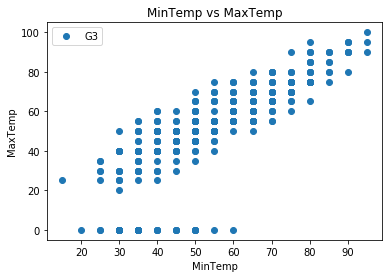

In [15]:
data.plot(x='G1', y='G3', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

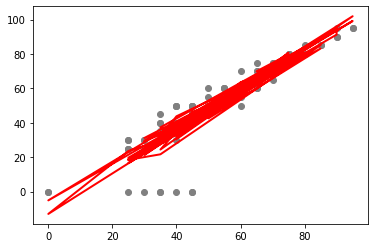

In [16]:
plt.scatter(x_test.G2, y_test,  color='gray')
plt.plot(x_test.G2, y_pred, color='red', linewidth=2)
plt.show()